In [1]:
import pandas as pd
import sqlite3
import time

In [2]:
connection = sqlite3.connect('/home/ccecilia/Downloads/bts_on_time.db')
cursor = connection.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()
# Print the table names
for name in table_names:
    print(name[0])

on_time
MASTER
DEREG


In [3]:
cursor.execute("SELECT count(*) FROM on_time;")
cursor.fetchall()

[(51915773,)]

In [4]:
cursor.execute(f"PRAGMA table_info(on_time);")
cursor.fetchall()

[(0, 'Year', 'INTEGER', 0, None, 0),
 (1, 'Quarter', 'INTEGER', 0, None, 0),
 (2, 'Month', 'INTEGER', 0, None, 0),
 (3, 'DayofMonth', 'INTEGER', 0, None, 0),
 (4, 'DayOfWeek', 'INTEGER', 0, None, 0),
 (5, 'FlightDate', 'TIMESTAMP', 0, None, 0),
 (6, 'Reporting_Airline', 'TEXT', 0, None, 0),
 (7, 'DOT_ID_Reporting_Airline', 'INTEGER', 0, None, 0),
 (8, 'IATA_CODE_Reporting_Airline', 'TEXT', 0, None, 0),
 (9, 'Tail_Number', 'TEXT', 0, None, 0),
 (10, 'Flight_Number_Reporting_Airline', 'INTEGER', 0, None, 0),
 (11, 'OriginAirportID', 'INTEGER', 0, None, 0),
 (12, 'OriginAirportSeqID', 'INTEGER', 0, None, 0),
 (13, 'OriginCityMarketID', 'INTEGER', 0, None, 0),
 (14, 'Origin', 'TEXT', 0, None, 0),
 (15, 'OriginCityName', 'TEXT', 0, None, 0),
 (16, 'OriginState', 'TEXT', 0, None, 0),
 (17, 'OriginStateFips', 'INTEGER', 0, None, 0),
 (18, 'OriginStateName', 'TEXT', 0, None, 0),
 (19, 'OriginWac', 'INTEGER', 0, None, 0),
 (20, 'DestAirportID', 'INTEGER', 0, None, 0),
 (21, 'DestAirportSeqID', 

In [13]:
cursor.execute("SELECT distinct DepTime FROM on_time;")
cursor.fetchall()

[('0855',),
 ('0850',),
 ('0853',),
 ('0856',),
 ('0859',),
 ('0901',),
 ('0903',),
 ('0854',),
 ('0852',),
 ('0900',),
 ('0916',),
 ('1043',),
 ('',),
 ('0858',),
 ('0922',),
 ('1141',),
 ('0857',),
 ('0851',),
 ('0940',),
 ('1226',),
 ('1219',),
 ('1227',),
 ('1224',),
 ('1225',),
 ('1228',),
 ('1230',),
 ('1233',),
 ('1223',),
 ('1231',),
 ('1221',),
 ('1259',),
 ('1222',),
 ('1214',),
 ('1215',),
 ('1332',),
 ('1243',),
 ('1247',),
 ('1352',),
 ('1232',),
 ('1638',),
 ('1220',),
 ('1240',),
 ('1328',),
 ('1304',),
 ('1754',),
 ('1742',),
 ('1329',),
 ('1700',),
 ('1434',),
 ('1348',),
 ('1402',),
 ('1628',),
 ('1320',),
 ('1313',),
 ('1341',),
 ('1316',),
 ('1310',),
 ('1347',),
 ('1346',),
 ('1345',),
 ('1457',),
 ('1315',),
 ('1308',),
 ('1312',),
 ('1323',),
 ('1311',),
 ('1309',),
 ('1319',),
 ('1805',),
 ('1842',),
 ('1809',),
 ('1919',),
 ('1807',),
 ('1804',),
 ('1815',),
 ('1927',),
 ('1812',),
 ('1806',),
 ('1811',),
 ('1803',),
 ('1858',),
 ('2326',),
 ('1757',),
 ('1813'

In [20]:
start_time = time.time()

# Open a new cursor
cursor.execute("SELECT Year, IATA_CODE_Reporting_Airline, DepDelayMinutes, ArrDelayMinutes FROM on_time;")
on_time_for_groupby = pd.DataFrame(cursor.fetchall(), columns=['Year','IATA_CODE_Reporting_Airline', 'DepDelayMinutes', 'ArrDelayMinutes'])

# Calculate and print the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")


Elapsed time: 203.9823 seconds


In [21]:
on_time_for_groupby.head()

,Year,IATA_CODE_Reporting_Airline,DepDelayMinutes,ArrDelayMinutes
0,2015,AA,0.00,7.00
1,2015,AA,0.00,0.00
2,2015,AA,0.00,0.00
3,2015,AA,0.00,0.00
4,2015,AA,0.00,0.00


In [22]:
start_time = time.time()
on_time_for_groupby['Year'] = on_time_for_groupby['Year'].astype(str)
# Remove rows with empty strings in 'DepDelayMinutes' and 'ArrDelayMinutes'
on_time_for_groupby = on_time_for_groupby[(on_time_for_groupby['DepDelayMinutes'] != '') & (on_time_for_groupby['ArrDelayMinutes'] != '')]

# Convert 'DepDelayMinutes' and 'ArrDelayMinutes' to float
on_time_for_groupby['DepDelayMinutes'] = on_time_for_groupby['DepDelayMinutes'].astype(float)
on_time_for_groupby['ArrDelayMinutes'] = on_time_for_groupby['ArrDelayMinutes'].astype(float)

on_time_groupby = on_time_for_groupby.groupby(['Year', 'IATA_CODE_Reporting_Airline']).mean().reset_index()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

Elapsed time: 102.1063 seconds


In [23]:
on_time_groupby

,Year,IATA_CODE_Reporting_Airline,DepDelayMinutes,ArrDelayMinutes
0,2015,AA,11.739303,12.079516
1,2015,AS,6.538244,7.495360
2,2015,B6,14.538879,14.842926
3,2015,DL,9.560028,9.245699
4,2015,EV,12.356284,13.528245
...,...,...,...,...
134,2023,OH,9.552144,10.397816
135,2023,OO,12.917687,14.073222
136,2023,UA,15.826122,16.050070
137,2023,WN,13.129942,11.954786


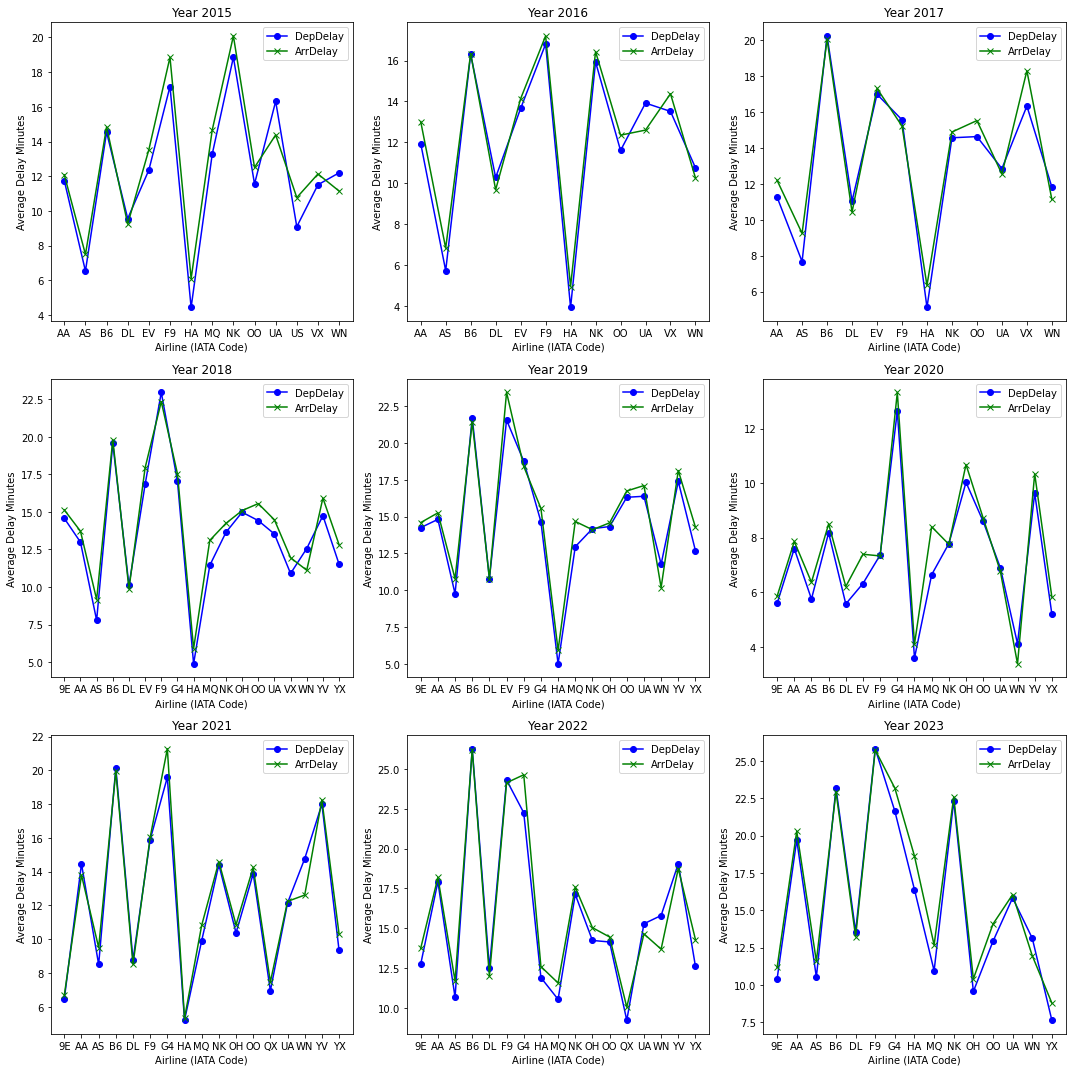

In [24]:
import matplotlib.pyplot as plt
on_time_groupby_sorted = on_time_groupby.sort_values(by='IATA_CODE_Reporting_Airline')
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Loop through each year and plot the data
for i, year in enumerate(['2015','2016','2017','2018','2019','2020','2021','2022','2023']):
    row, col = divmod(i, 3)  # Calculate the subplot row and column
    ax = axes[row, col]
    group = on_time_groupby_sorted[on_time_groupby_sorted['Year'] == year]
    
    # Plot 'DepDelayMinutes' and 'ArrDelayMinutes' as line plots with different colors
    ax.plot(group['IATA_CODE_Reporting_Airline'], group['DepDelayMinutes'], marker='o', label='DepDelay', color='blue')
    ax.plot(group['IATA_CODE_Reporting_Airline'], group['ArrDelayMinutes'], marker='x', label='ArrDelay', color='green')
    
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Airline (IATA Code)')
    ax.set_ylabel('Average Delay Minutes')
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

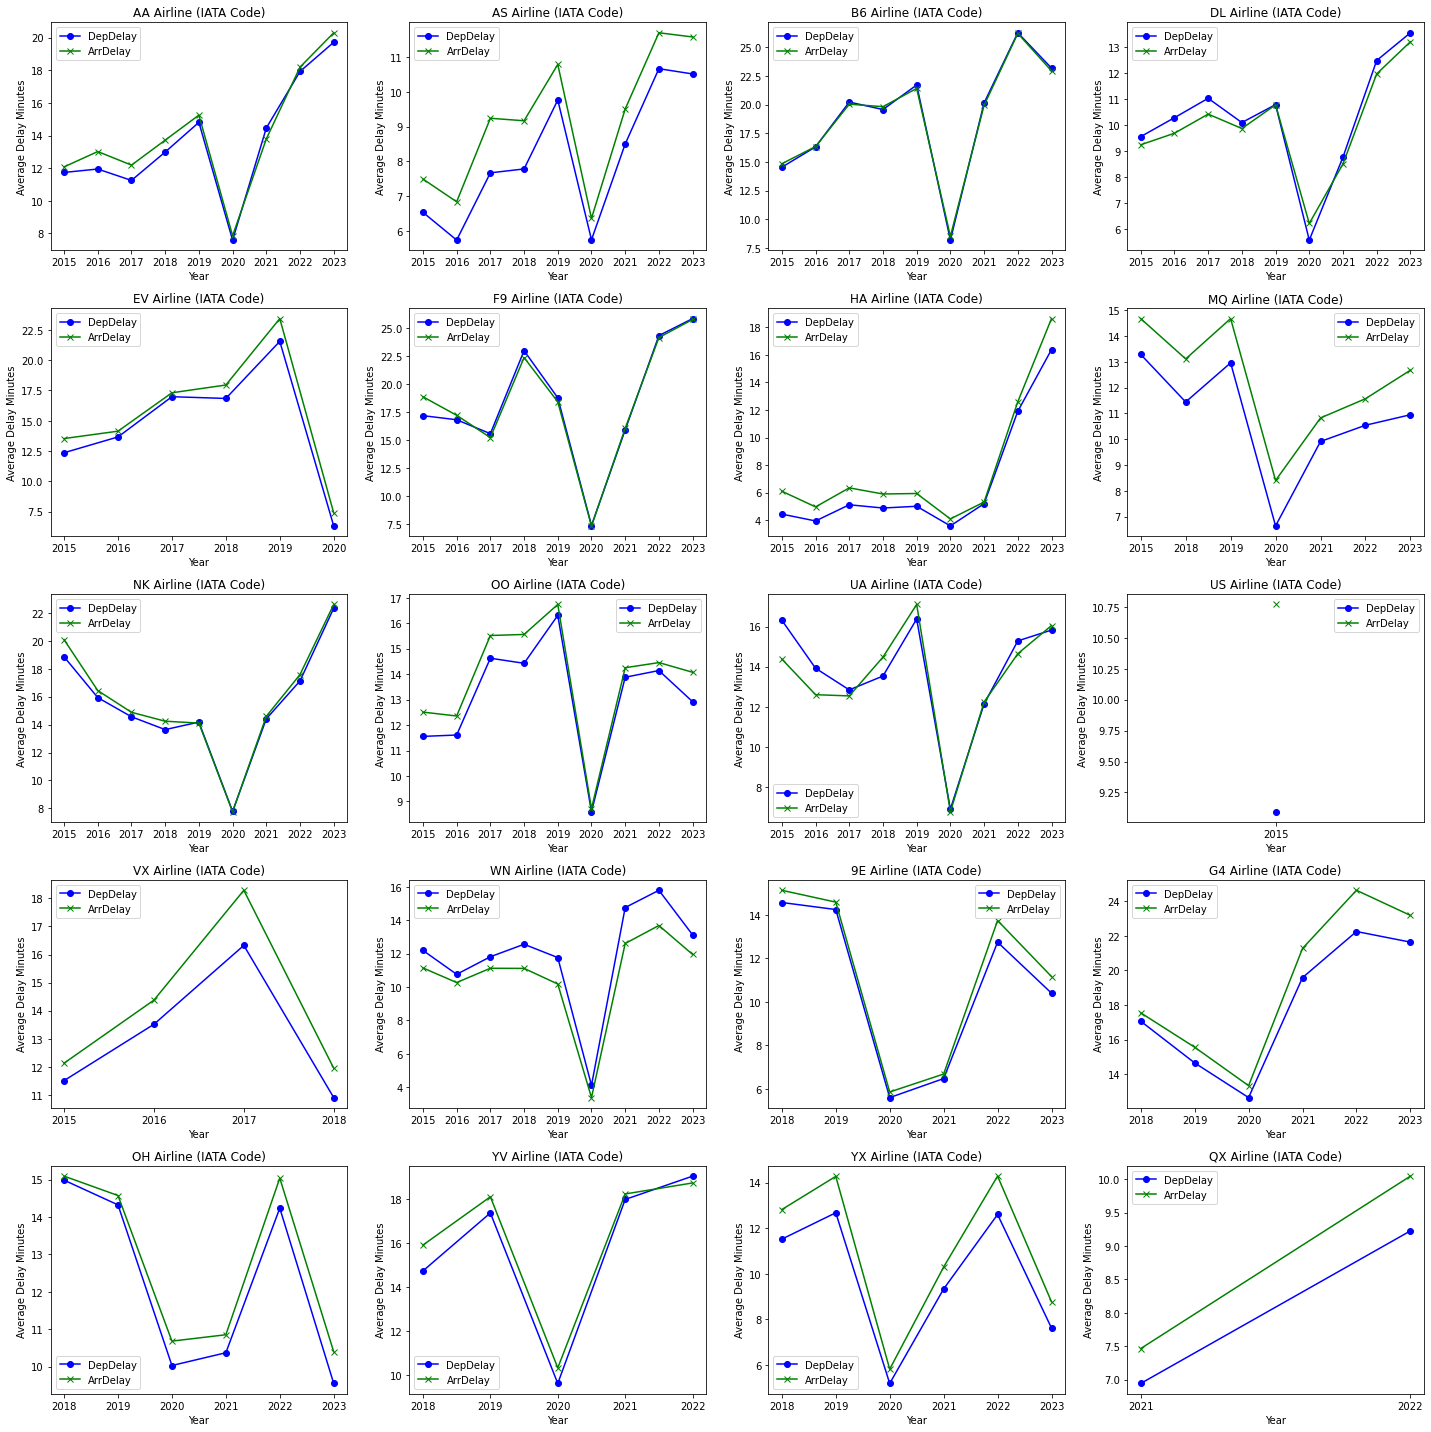

In [25]:
airlines = on_time_groupby['IATA_CODE_Reporting_Airline'].unique()
# Create a 5x4 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Loop through each airline and plot the data

for i, airline in enumerate(airlines):
    row, col = divmod(i, 4)  # Calculate the subplot row and column
    ax = axes[row, col]
    group = on_time_groupby[on_time_groupby['IATA_CODE_Reporting_Airline'] == airline]
    
    # Plot 'DepDelayMinutes' and 'ArrDelayMinutes' as line plots with different colors
    ax.plot(group['Year'], group['DepDelayMinutes'], marker='o', label='DepDelay', color='blue')
    ax.plot(group['Year'], group['ArrDelayMinutes'], marker='x', label='ArrDelay', color='green')
    
    ax.set_title(f'{airline} Airline (IATA Code)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Delay Minutes')
    # Add a legend for this subplot
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
# Open a new cursor
cursor.execute("SELECT Year, DepDelayMinutes, ArrDelayMinutes FROM on_time WHERE IATA_CODE_Reporting_Airline=='US';")
US = pd.DataFrame(cursor.fetchall(), columns=['Year','DepDelayMinutes', 'ArrDelayMinutes'])
cursor.execute("SELECT Year, DepDelayMinutes, ArrDelayMinutes FROM on_time WHERE IATA_CODE_Reporting_Airline=='VX';")
VX = pd.DataFrame(cursor.fetchall(), columns=['Year','DepDelayMinutes', 'ArrDelayMinutes'])
cursor.execute("SELECT Year, DepDelayMinutes, ArrDelayMinutes FROM on_time WHERE IATA_CODE_Reporting_Airline=='QX';")
QX = pd.DataFrame(cursor.fetchall(), columns=['Year','DepDelayMinutes', 'ArrDelayMinutes'])

cursor.close()
connection.close()


In [17]:
len(US)

198715

AA - 2015-2023 US - 2015
AS - 2015-2023 VX - 2015-2018, QX - 2021-2022
B6 - 2015-2023
DL - 2015-2023
EV - 2015-2020 (Ceased operations on August 22, 2022)
F9 - 2015-2023
HA - 2015-2023
MQ - 2015-2023
NK - 2015-2023
OO - 2015-2023
UA - 2015-2023
WN - 2015-2023

9E - 2018-2023 (a wholly-owned subsidiary of Delta Air Lines)
G4 - 2018-2023
OH - 2018-2023
YX - 2018-2023

YV - 2018-2022 (Mesa Airlines operates flights on behalf of United Airlines, and DHL Express.)


In [9]:
# get headers from on_time
cursor.execute("PRAGMA table_info(on_time);")
column_names = [column[1] for column in cursor.fetchall()]


In [14]:
for column_name in column_names:
    sql_query = f"SELECT COUNT(*) FROM on_time WHERE {column_name}=='' ;"
    cursor.execute(sql_query)
    null_count = cursor.fetchone()[0]
    print(f"Column '{column_name}' has {null_count} null values.")

Column 'Year' has 0 null values.
Column 'Quarter' has 0 null values.
Column 'Month' has 0 null values.
Column 'DayofMonth' has 0 null values.
Column 'DayOfWeek' has 0 null values.
Column 'FlightDate' has 0 null values.
Column 'Reporting_Airline' has 0 null values.
Column 'DOT_ID_Reporting_Airline' has 0 null values.
Column 'IATA_CODE_Reporting_Airline' has 0 null values.
Column 'Tail_Number' has 282010 null values.
Column 'Flight_Number_Reporting_Airline' has 0 null values.
Column 'OriginAirportID' has 0 null values.
Column 'OriginAirportSeqID' has 0 null values.
Column 'OriginCityMarketID' has 0 null values.
Column 'Origin' has 0 null values.
Column 'OriginCityName' has 0 null values.
Column 'OriginState' has 0 null values.
Column 'OriginStateFips' has 0 null values.
Column 'OriginStateName' has 0 null values.
Column 'OriginWac' has 0 null values.
Column 'DestAirportID' has 0 null values.
Column 'DestAirportSeqID' has 0 null values.
Column 'DestCityMarketID' has 0 null values.
Column 

In [6]:
airlines = ['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'WN']
sql_query = "SELECT * FROM on_time WHERE IATA_CODE_Reporting_Airline == 'AA'"
cursor.execute(sql_query)
AA_df = pd.DataFrame(cursor.fetchall(), columns=column_names)

KeyboardInterrupt: 

In [ ]:
airlines = ['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'WN']
batch_size = 10000  

# Create an empty DataFrame to store the results
on_time_df = pd.DataFrame()

for offset in range(0, len(airlines), batch_size):
    batch_airlines = airlines[offset:offset + batch_size]
    
    sql_query = "SELECT * FROM on_time WHERE IATA_CODE_Reporting_Airline IN ({})".format(
        ",".join(["'{}'".format(airline) for airline in batch_airlines])
    )
    cursor.execute(sql_query)
    batch_df = pd.DataFrame(cursor.fetchall())
    on_time_df = pd.concat([on_time_df, batch_df], ignore_index=True)

In [ ]:
# Create the DataFrame with column names
on_time_df = pd.DataFrame(cursor.fetchall(), columns=column_names)

In [ ]:
on_time_df = on_time_df.dropna(axis=1, how='all')